In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import seaborn as sns
sns.set(color_codes=True)

In [5]:
style.use('seaborn-ticks')
sns.set(color_codes=True)

# Tabulation

In [6]:
url = 'https://api.covid19india.org/states_daily.json'

In [7]:
import urllib.request

In [8]:
urllib.request.urlretrieve(url, 'data.json');

In [9]:
covid_data = pd.read_json('data.json')

In [10]:
covid_data

,states_daily
0,"{'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '..."
1,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
2,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
3,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
4,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
...,...
1210,"{'an': '33', 'ap': '3359', 'ar': '16', 'as': '..."
1211,"{'an': '0', 'ap': '38', 'ar': '0', 'as': '5', ..."
1212,"{'an': '37', 'ap': '10759', 'ar': '110', 'as':..."
1213,"{'an': '33', 'ap': '3992', 'ar': '9', 'as': '3..."


In [11]:
import json

In [12]:
with open('data.json') as f:
    data = json.load(f)

In [13]:
data = data['states_daily']

In [14]:
covid_data = pd.json_normalize(data)

In [15]:
covid_data

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,33,3359,16,297,4774,454,17263,21-Apr-21,2021-04-21,0,...,2,Recovered,2887,7071,0,179427,0,14198,894,5616
1211,0,38,0,5,56,2,193,21-Apr-21,2021-04-21,0,...,0,Deceased,20,53,0,2101,0,187,34,58
1212,37,10759,110,1931,11489,634,16750,22-Apr-21,2021-04-22,0,...,124,Confirmed,5567,12652,168,332518,0,34254,3998,11948
1213,33,3992,9,398,5308,482,17739,22-Apr-21,2021-04-22,0,...,18,Recovered,2251,7526,74,192311,0,16514,1744,6590


In [16]:
df = covid_data

In [17]:
df.date = pd.to_datetime(df.date)

In [18]:
df = df[df.status == 'Confirmed']

In [19]:
df.drop('status', axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
df.set_index('date', inplace=True)

In [21]:
df

,an,ap,ar,as,br,ch,ct,dateymd,dd,dl,...,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,1,0,0,0,0,0,2020-03-14,0,7,...,3,0,1,1,0,81,0,12,0,0
2020-03-15,0,0,0,0,0,0,0,2020-03-15,0,0,...,1,0,2,0,0,27,0,1,0,0
2020-03-16,0,0,0,0,0,0,0,2020-03-16,0,0,...,0,0,1,0,0,15,0,0,1,0
2020-03-17,0,0,0,0,0,0,0,2020-03-17,0,1,...,0,0,1,0,0,11,0,2,0,1
2020-03-18,0,0,0,0,0,0,0,2020-03-18,0,2,...,3,0,8,1,0,37,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-18,59,6582,20,639,8690,625,12345,2021-04-18,0,25462,...,10262,105,5093,10723,69,275063,0,30566,2630,8419
2021-04-19,31,5963,65,1367,7487,612,13834,2021-04-19,0,23686,...,11967,9,4009,10941,32,257003,0,28211,2160,8426
2021-04-20,45,8987,61,1651,10455,602,15625,2021-04-20,0,28395,...,12201,91,5926,10986,60,294365,0,29574,3012,9819


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 405 entries, 2020-03-14 to 2021-04-22
Data columns (total 40 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   an       405 non-null    object
 1   ap       405 non-null    object
 2   ar       405 non-null    object
 3   as       405 non-null    object
 4   br       405 non-null    object
 5   ch       405 non-null    object
 6   ct       405 non-null    object
 7   dateymd  405 non-null    object
 8   dd       405 non-null    object
 9   dl       405 non-null    object
 10  dn       405 non-null    object
 11  ga       405 non-null    object
 12  gj       405 non-null    object
 13  hp       405 non-null    object
 14  hr       405 non-null    object
 15  jh       405 non-null    object
 16  jk       405 non-null    object
 17  ka       405 non-null    object
 18  kl       405 non-null    object
 19  la       405 non-null    object
 20  ld       405 non-null    object
 21  mh       405 non-nul

In [26]:
df.tn

date
2020-03-14        1
2020-03-15        0
2020-03-16        0
2020-03-17        0
2020-03-18        1
              ...  
2021-04-18    10723
2021-04-19    10941
2021-04-20    10986
2021-04-21    11681
2021-04-22    12652
Name: tn, Length: 405, dtype: object

In [27]:
pd.to_numeric(df.tn)

date
2020-03-14        1
2020-03-15        0
2020-03-16        0
2020-03-17        0
2020-03-18        1
              ...  
2021-04-18    10723
2021-04-19    10941
2021-04-20    10986
2021-04-21    11681
2021-04-22    12652
Name: tn, Length: 405, dtype: int64

In [25]:
df = df.apply(pd.to_numeric)

ValueError: Unable to parse string "2020-03-14" at position 0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 405 entries, 2020-03-14 to 2021-04-22
Data columns (total 40 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   an       405 non-null    object
 1   ap       405 non-null    object
 2   ar       405 non-null    object
 3   as       405 non-null    object
 4   br       405 non-null    object
 5   ch       405 non-null    object
 6   ct       405 non-null    object
 7   dateymd  405 non-null    object
 8   dd       405 non-null    object
 9   dl       405 non-null    object
 10  dn       405 non-null    object
 11  ga       405 non-null    object
 12  gj       405 non-null    object
 13  hp       405 non-null    object
 14  hr       405 non-null    object
 15  jh       405 non-null    object
 16  jk       405 non-null    object
 17  ka       405 non-null    object
 18  kl       405 non-null    object
 19  la       405 non-null    object
 20  ld       405 non-null    object
 21  mh       405 non-nul

In [ ]:
df.tail(7)

## Styling tabulation

In [29]:
df = df.tail(7)

In [30]:
df.style

,an,ap,ar,as,br,ch,ct,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-16 00:00:00,27,6096,28,573,6253,481,14912,2021-04-16,0,19486,138,927,8920,842,6277,3843,1144,14859,10031,245,44,63729,121,31,11045,25,22,3108,3891,531,7359,22,3840,8449,31,234002,0,27360,2402,6910
2021-04-17 00:00:00,42,7224,19,876,7870,431,16083,2021-04-17,0,24375,108,762,9541,1392,7717,3838,1145,17489,13835,362,106,67123,95,39,11269,62,32,3144,4431,715,9046,72,4446,9344,58,260895,0,27334,2757,7713
2021-04-18 00:00:00,59,6582,20,639,8690,625,12345,2021-04-18,0,25462,184,951,10340,788,7177,3992,1526,19067,18257,60,114,68631,71,72,12248,50,19,3664,4900,663,10262,105,5093,10723,69,275063,0,30566,2630,8419
2021-04-19 00:00:00,31,5963,65,1367,7487,612,13834,2021-04-19,0,23686,121,940,11403,1695,6842,4290,1516,15785,13644,175,117,58924,110,54,12897,45,13,4445,4622,565,11967,9,4009,10941,32,257003,0,28211,2160,8426
2021-04-20 00:00:00,45,8987,61,1651,10455,602,15625,2021-04-20,0,28395,291,1160,12206,1340,7811,5080,2030,21794,19577,250,53,62097,137,94,12727,91,82,4761,4656,638,12201,91,5926,10986,60,294365,0,29574,3012,9819
2021-04-21 00:00:00,24,9716,73,1665,12222,622,14519,2021-04-21,0,24638,234,1502,12553,1692,9623,5041,2204,23558,22414,183,191,67468,192,92,13107,90,97,4851,4953,619,14622,50,6542,11681,0,315735,0,33106,4807,10784
2021-04-22 00:00:00,37,10759,110,1931,11489,634,16750,2021-04-22,0,26169,346,1410,13105,1774,9742,7595,1965,25795,26995,198,145,67013,180,86,12384,73,53,6164,5450,987,14468,124,5567,12652,168,332518,0,34254,3998,11948


In [31]:
def colour_red_negative(x):
    color = 'red' if x < 0 else 'white'
    return 'color: ' + color

In [32]:
df.style.applymap(colour_red_negative)

TypeError: '<' not supported between instances of 'str' and 'int'

In [33]:
df.drop('un', axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
df.style.applymap(colour_red_negative)

TypeError: '<' not supported between instances of 'str' and 'int'

In [35]:
df.style.highlight_max(color='red')

,an,ap,ar,as,br,ch,ct,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-16 00:00:00,27,6096,28,573,6253,481,14912,2021-04-16,0,19486,138,927,8920,842,6277,3843,1144,14859,10031,245,44,63729,121,31,11045,25,22,3108,3891,531,7359,22,3840,8449,31,234002,27360,2402,6910
2021-04-17 00:00:00,42,7224,19,876,7870,431,16083,2021-04-17,0,24375,108,762,9541,1392,7717,3838,1145,17489,13835,362,106,67123,95,39,11269,62,32,3144,4431,715,9046,72,4446,9344,58,260895,27334,2757,7713
2021-04-18 00:00:00,59,6582,20,639,8690,625,12345,2021-04-18,0,25462,184,951,10340,788,7177,3992,1526,19067,18257,60,114,68631,71,72,12248,50,19,3664,4900,663,10262,105,5093,10723,69,275063,30566,2630,8419
2021-04-19 00:00:00,31,5963,65,1367,7487,612,13834,2021-04-19,0,23686,121,940,11403,1695,6842,4290,1516,15785,13644,175,117,58924,110,54,12897,45,13,4445,4622,565,11967,9,4009,10941,32,257003,28211,2160,8426
2021-04-20 00:00:00,45,8987,61,1651,10455,602,15625,2021-04-20,0,28395,291,1160,12206,1340,7811,5080,2030,21794,19577,250,53,62097,137,94,12727,91,82,4761,4656,638,12201,91,5926,10986,60,294365,29574,3012,9819
2021-04-21 00:00:00,24,9716,73,1665,12222,622,14519,2021-04-21,0,24638,234,1502,12553,1692,9623,5041,2204,23558,22414,183,191,67468,192,92,13107,90,97,4851,4953,619,14622,50,6542,11681,0,315735,33106,4807,10784
2021-04-22 00:00:00,37,10759,110,1931,11489,634,16750,2021-04-22,0,26169,346,1410,13105,1774,9742,7595,1965,25795,26995,198,145,67013,180,86,12384,73,53,6164,5450,987,14468,124,5567,12652,168,332518,34254,3998,11948


In [36]:
df.drop(['dd', 'ld'], axis=1,inplace=True)

In [37]:
df.style.highlight_max(color='red').highlight_min(color='green')

,an,ap,ar,as,br,ch,ct,dateymd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-16 00:00:00,27,6096,28,573,6253,481,14912,2021-04-16,19486,138,927,8920,842,6277,3843,1144,14859,10031,245,63729,121,31,11045,25,22,3108,3891,531,7359,22,3840,8449,31,234002,27360,2402,6910
2021-04-17 00:00:00,42,7224,19,876,7870,431,16083,2021-04-17,24375,108,762,9541,1392,7717,3838,1145,17489,13835,362,67123,95,39,11269,62,32,3144,4431,715,9046,72,4446,9344,58,260895,27334,2757,7713
2021-04-18 00:00:00,59,6582,20,639,8690,625,12345,2021-04-18,25462,184,951,10340,788,7177,3992,1526,19067,18257,60,68631,71,72,12248,50,19,3664,4900,663,10262,105,5093,10723,69,275063,30566,2630,8419
2021-04-19 00:00:00,31,5963,65,1367,7487,612,13834,2021-04-19,23686,121,940,11403,1695,6842,4290,1516,15785,13644,175,58924,110,54,12897,45,13,4445,4622,565,11967,9,4009,10941,32,257003,28211,2160,8426
2021-04-20 00:00:00,45,8987,61,1651,10455,602,15625,2021-04-20,28395,291,1160,12206,1340,7811,5080,2030,21794,19577,250,62097,137,94,12727,91,82,4761,4656,638,12201,91,5926,10986,60,294365,29574,3012,9819
2021-04-21 00:00:00,24,9716,73,1665,12222,622,14519,2021-04-21,24638,234,1502,12553,1692,9623,5041,2204,23558,22414,183,67468,192,92,13107,90,97,4851,4953,619,14622,50,6542,11681,0,315735,33106,4807,10784
2021-04-22 00:00:00,37,10759,110,1931,11489,634,16750,2021-04-22,26169,346,1410,13105,1774,9742,7595,1965,25795,26995,198,67013,180,86,12384,73,53,6164,5450,987,14468,124,5567,12652,168,332518,34254,3998,11948


In [38]:
df.drop('tt', axis=1, inplace=True)

In [39]:
def bold_max_value(x):
    is_max = (x == x.max())
    return ['font-weight: bold' if y else '' for y in is_max]

In [40]:
df.style.apply(bold_max_value)

,an,ap,ar,as,br,ch,ct,dateymd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-16 00:00:00,27,6096,28,573,6253,481,14912,2021-04-16,19486,138,927,8920,842,6277,3843,1144,14859,10031,245,63729,121,31,11045,25,22,3108,3891,531,7359,22,3840,8449,31,27360,2402,6910
2021-04-17 00:00:00,42,7224,19,876,7870,431,16083,2021-04-17,24375,108,762,9541,1392,7717,3838,1145,17489,13835,362,67123,95,39,11269,62,32,3144,4431,715,9046,72,4446,9344,58,27334,2757,7713
2021-04-18 00:00:00,59,6582,20,639,8690,625,12345,2021-04-18,25462,184,951,10340,788,7177,3992,1526,19067,18257,60,68631,71,72,12248,50,19,3664,4900,663,10262,105,5093,10723,69,30566,2630,8419
2021-04-19 00:00:00,31,5963,65,1367,7487,612,13834,2021-04-19,23686,121,940,11403,1695,6842,4290,1516,15785,13644,175,58924,110,54,12897,45,13,4445,4622,565,11967,9,4009,10941,32,28211,2160,8426
2021-04-20 00:00:00,45,8987,61,1651,10455,602,15625,2021-04-20,28395,291,1160,12206,1340,7811,5080,2030,21794,19577,250,62097,137,94,12727,91,82,4761,4656,638,12201,91,5926,10986,60,29574,3012,9819
2021-04-21 00:00:00,24,9716,73,1665,12222,622,14519,2021-04-21,24638,234,1502,12553,1692,9623,5041,2204,23558,22414,183,67468,192,92,13107,90,97,4851,4953,619,14622,50,6542,11681,0,33106,4807,10784
2021-04-22 00:00:00,37,10759,110,1931,11489,634,16750,2021-04-22,26169,346,1410,13105,1774,9742,7595,1965,25795,26995,198,67013,180,86,12384,73,53,6164,5450,987,14468,124,5567,12652,168,34254,3998,11948


In [41]:
df.style.apply(bold_max_value).highlight_min(color='green')

,an,ap,ar,as,br,ch,ct,dateymd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-16 00:00:00,27,6096,28,573,6253,481,14912,2021-04-16,19486,138,927,8920,842,6277,3843,1144,14859,10031,245,63729,121,31,11045,25,22,3108,3891,531,7359,22,3840,8449,31,27360,2402,6910
2021-04-17 00:00:00,42,7224,19,876,7870,431,16083,2021-04-17,24375,108,762,9541,1392,7717,3838,1145,17489,13835,362,67123,95,39,11269,62,32,3144,4431,715,9046,72,4446,9344,58,27334,2757,7713
2021-04-18 00:00:00,59,6582,20,639,8690,625,12345,2021-04-18,25462,184,951,10340,788,7177,3992,1526,19067,18257,60,68631,71,72,12248,50,19,3664,4900,663,10262,105,5093,10723,69,30566,2630,8419
2021-04-19 00:00:00,31,5963,65,1367,7487,612,13834,2021-04-19,23686,121,940,11403,1695,6842,4290,1516,15785,13644,175,58924,110,54,12897,45,13,4445,4622,565,11967,9,4009,10941,32,28211,2160,8426
2021-04-20 00:00:00,45,8987,61,1651,10455,602,15625,2021-04-20,28395,291,1160,12206,1340,7811,5080,2030,21794,19577,250,62097,137,94,12727,91,82,4761,4656,638,12201,91,5926,10986,60,29574,3012,9819
2021-04-21 00:00:00,24,9716,73,1665,12222,622,14519,2021-04-21,24638,234,1502,12553,1692,9623,5041,2204,23558,22414,183,67468,192,92,13107,90,97,4851,4953,619,14622,50,6542,11681,0,33106,4807,10784
2021-04-22 00:00:00,37,10759,110,1931,11489,634,16750,2021-04-22,26169,346,1410,13105,1774,9742,7595,1965,25795,26995,198,67013,180,86,12384,73,53,6164,5450,987,14468,124,5567,12652,168,34254,3998,11948


In [42]:
df.style.apply(bold_max_value).highlight_min(color='green', axis=1)

,an,ap,ar,as,br,ch,ct,dateymd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-16 00:00:00,27,6096,28,573,6253,481,14912,2021-04-16,19486,138,927,8920,842,6277,3843,1144,14859,10031,245,63729,121,31,11045,25,22,3108,3891,531,7359,22,3840,8449,31,27360,2402,6910
2021-04-17 00:00:00,42,7224,19,876,7870,431,16083,2021-04-17,24375,108,762,9541,1392,7717,3838,1145,17489,13835,362,67123,95,39,11269,62,32,3144,4431,715,9046,72,4446,9344,58,27334,2757,7713
2021-04-18 00:00:00,59,6582,20,639,8690,625,12345,2021-04-18,25462,184,951,10340,788,7177,3992,1526,19067,18257,60,68631,71,72,12248,50,19,3664,4900,663,10262,105,5093,10723,69,30566,2630,8419
2021-04-19 00:00:00,31,5963,65,1367,7487,612,13834,2021-04-19,23686,121,940,11403,1695,6842,4290,1516,15785,13644,175,58924,110,54,12897,45,13,4445,4622,565,11967,9,4009,10941,32,28211,2160,8426
2021-04-20 00:00:00,45,8987,61,1651,10455,602,15625,2021-04-20,28395,291,1160,12206,1340,7811,5080,2030,21794,19577,250,62097,137,94,12727,91,82,4761,4656,638,12201,91,5926,10986,60,29574,3012,9819
2021-04-21 00:00:00,24,9716,73,1665,12222,622,14519,2021-04-21,24638,234,1502,12553,1692,9623,5041,2204,23558,22414,183,67468,192,92,13107,90,97,4851,4953,619,14622,50,6542,11681,0,33106,4807,10784
2021-04-22 00:00:00,37,10759,110,1931,11489,634,16750,2021-04-22,26169,346,1410,13105,1774,9742,7595,1965,25795,26995,198,67013,180,86,12384,73,53,6164,5450,987,14468,124,5567,12652,168,34254,3998,11948


In [43]:
df.style.apply(bold_max_value).highlight_max(color='red', axis=1)

,an,ap,ar,as,br,ch,ct,dateymd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-16 00:00:00,27,6096,28,573,6253,481,14912,2021-04-16,19486,138,927,8920,842,6277,3843,1144,14859,10031,245,63729,121,31,11045,25,22,3108,3891,531,7359,22,3840,8449,31,27360,2402,6910
2021-04-17 00:00:00,42,7224,19,876,7870,431,16083,2021-04-17,24375,108,762,9541,1392,7717,3838,1145,17489,13835,362,67123,95,39,11269,62,32,3144,4431,715,9046,72,4446,9344,58,27334,2757,7713
2021-04-18 00:00:00,59,6582,20,639,8690,625,12345,2021-04-18,25462,184,951,10340,788,7177,3992,1526,19067,18257,60,68631,71,72,12248,50,19,3664,4900,663,10262,105,5093,10723,69,30566,2630,8419
2021-04-19 00:00:00,31,5963,65,1367,7487,612,13834,2021-04-19,23686,121,940,11403,1695,6842,4290,1516,15785,13644,175,58924,110,54,12897,45,13,4445,4622,565,11967,9,4009,10941,32,28211,2160,8426
2021-04-20 00:00:00,45,8987,61,1651,10455,602,15625,2021-04-20,28395,291,1160,12206,1340,7811,5080,2030,21794,19577,250,62097,137,94,12727,91,82,4761,4656,638,12201,91,5926,10986,60,29574,3012,9819
2021-04-21 00:00:00,24,9716,73,1665,12222,622,14519,2021-04-21,24638,234,1502,12553,1692,9623,5041,2204,23558,22414,183,67468,192,92,13107,90,97,4851,4953,619,14622,50,6542,11681,0,33106,4807,10784
2021-04-22 00:00:00,37,10759,110,1931,11489,634,16750,2021-04-22,26169,346,1410,13105,1774,9742,7595,1965,25795,26995,198,67013,180,86,12384,73,53,6164,5450,987,14468,124,5567,12652,168,34254,3998,11948


In [44]:
df.style.background_gradient(cmap='Reds')

,an,ap,ar,as,br,ch,ct,dateymd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-16 00:00:00,27,6096,28,573,6253,481,14912,2021-04-16,19486,138,927,8920,842,6277,3843,1144,14859,10031,245,63729,121,31,11045,25,22,3108,3891,531,7359,22,3840,8449,31,27360,2402,6910
2021-04-17 00:00:00,42,7224,19,876,7870,431,16083,2021-04-17,24375,108,762,9541,1392,7717,3838,1145,17489,13835,362,67123,95,39,11269,62,32,3144,4431,715,9046,72,4446,9344,58,27334,2757,7713
2021-04-18 00:00:00,59,6582,20,639,8690,625,12345,2021-04-18,25462,184,951,10340,788,7177,3992,1526,19067,18257,60,68631,71,72,12248,50,19,3664,4900,663,10262,105,5093,10723,69,30566,2630,8419
2021-04-19 00:00:00,31,5963,65,1367,7487,612,13834,2021-04-19,23686,121,940,11403,1695,6842,4290,1516,15785,13644,175,58924,110,54,12897,45,13,4445,4622,565,11967,9,4009,10941,32,28211,2160,8426
2021-04-20 00:00:00,45,8987,61,1651,10455,602,15625,2021-04-20,28395,291,1160,12206,1340,7811,5080,2030,21794,19577,250,62097,137,94,12727,91,82,4761,4656,638,12201,91,5926,10986,60,29574,3012,9819
2021-04-21 00:00:00,24,9716,73,1665,12222,622,14519,2021-04-21,24638,234,1502,12553,1692,9623,5041,2204,23558,22414,183,67468,192,92,13107,90,97,4851,4953,619,14622,50,6542,11681,0,33106,4807,10784
2021-04-22 00:00:00,37,10759,110,1931,11489,634,16750,2021-04-22,26169,346,1410,13105,1774,9742,7595,1965,25795,26995,198,67013,180,86,12384,73,53,6164,5450,987,14468,124,5567,12652,168,34254,3998,11948


In [45]:
df.style.background_gradient(cmap='Reds', axis=1)

,an,ap,ar,as,br,ch,ct,dateymd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-16 00:00:00,27,6096,28,573,6253,481,14912,2021-04-16,19486,138,927,8920,842,6277,3843,1144,14859,10031,245,63729,121,31,11045,25,22,3108,3891,531,7359,22,3840,8449,31,27360,2402,6910
2021-04-17 00:00:00,42,7224,19,876,7870,431,16083,2021-04-17,24375,108,762,9541,1392,7717,3838,1145,17489,13835,362,67123,95,39,11269,62,32,3144,4431,715,9046,72,4446,9344,58,27334,2757,7713
2021-04-18 00:00:00,59,6582,20,639,8690,625,12345,2021-04-18,25462,184,951,10340,788,7177,3992,1526,19067,18257,60,68631,71,72,12248,50,19,3664,4900,663,10262,105,5093,10723,69,30566,2630,8419
2021-04-19 00:00:00,31,5963,65,1367,7487,612,13834,2021-04-19,23686,121,940,11403,1695,6842,4290,1516,15785,13644,175,58924,110,54,12897,45,13,4445,4622,565,11967,9,4009,10941,32,28211,2160,8426
2021-04-20 00:00:00,45,8987,61,1651,10455,602,15625,2021-04-20,28395,291,1160,12206,1340,7811,5080,2030,21794,19577,250,62097,137,94,12727,91,82,4761,4656,638,12201,91,5926,10986,60,29574,3012,9819
2021-04-21 00:00:00,24,9716,73,1665,12222,622,14519,2021-04-21,24638,234,1502,12553,1692,9623,5041,2204,23558,22414,183,67468,192,92,13107,90,97,4851,4953,619,14622,50,6542,11681,0,33106,4807,10784
2021-04-22 00:00:00,37,10759,110,1931,11489,634,16750,2021-04-22,26169,346,1410,13105,1774,9742,7595,1965,25795,26995,198,67013,180,86,12384,73,53,6164,5450,987,14468,124,5567,12652,168,34254,3998,11948


In [46]:
df.style.background_gradient(cmap='Reds', subset=['mh', 'tn', 'dl'])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [47]:
df.style.bar()

,an,ap,ar,as,br,ch,ct,dateymd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-16 00:00:00,27,6096,28,573,6253,481,14912,2021-04-16,19486,138,927,8920,842,6277,3843,1144,14859,10031,245,63729,121,31,11045,25,22,3108,3891,531,7359,22,3840,8449,31,27360,2402,6910
2021-04-17 00:00:00,42,7224,19,876,7870,431,16083,2021-04-17,24375,108,762,9541,1392,7717,3838,1145,17489,13835,362,67123,95,39,11269,62,32,3144,4431,715,9046,72,4446,9344,58,27334,2757,7713
2021-04-18 00:00:00,59,6582,20,639,8690,625,12345,2021-04-18,25462,184,951,10340,788,7177,3992,1526,19067,18257,60,68631,71,72,12248,50,19,3664,4900,663,10262,105,5093,10723,69,30566,2630,8419
2021-04-19 00:00:00,31,5963,65,1367,7487,612,13834,2021-04-19,23686,121,940,11403,1695,6842,4290,1516,15785,13644,175,58924,110,54,12897,45,13,4445,4622,565,11967,9,4009,10941,32,28211,2160,8426
2021-04-20 00:00:00,45,8987,61,1651,10455,602,15625,2021-04-20,28395,291,1160,12206,1340,7811,5080,2030,21794,19577,250,62097,137,94,12727,91,82,4761,4656,638,12201,91,5926,10986,60,29574,3012,9819
2021-04-21 00:00:00,24,9716,73,1665,12222,622,14519,2021-04-21,24638,234,1502,12553,1692,9623,5041,2204,23558,22414,183,67468,192,92,13107,90,97,4851,4953,619,14622,50,6542,11681,0,33106,4807,10784
2021-04-22 00:00:00,37,10759,110,1931,11489,634,16750,2021-04-22,26169,346,1410,13105,1774,9742,7595,1965,25795,26995,198,67013,180,86,12384,73,53,6164,5450,987,14468,124,5567,12652,168,34254,3998,11948


In [48]:
df.style.bar(subset=['mh', 'tn', 'dl'])

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [49]:
df[['mh', 'tn', 'dl']].style.bar()

,mh,tn,dl
date,,,
2021-04-16 00:00:00,63729,8449,19486
2021-04-17 00:00:00,67123,9344,24375
2021-04-18 00:00:00,68631,10723,25462
2021-04-19 00:00:00,58924,10941,23686
2021-04-20 00:00:00,62097,10986,28395
2021-04-21 00:00:00,67468,11681,24638
2021-04-22 00:00:00,67013,12652,26169


In [50]:
df[['mh', 'tn', 'dl']].style.bar(subset=['mh'], color='red').bar(subset=['tn'], color='orange').bar(subset=['dl'], color='yellow')

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

# Distribution of data

## Distribution of a single continuous variable

### Histogram

In [51]:
x = np.random.normal(size=1000)

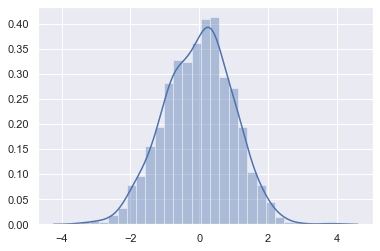

In [52]:
sns.distplot(x);

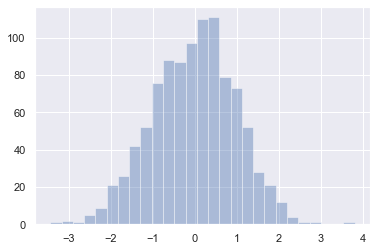

In [53]:
sns.distplot(x, kde=False);

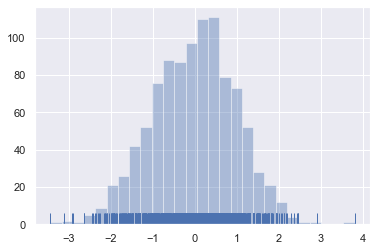

In [54]:
sns.distplot(x, kde=False, rug=True);

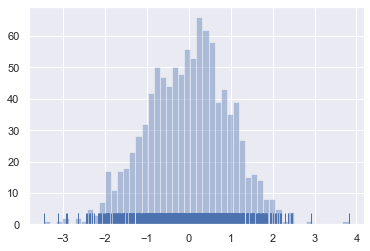

In [55]:
sns.distplot(x, kde=False, rug=True, bins=50);

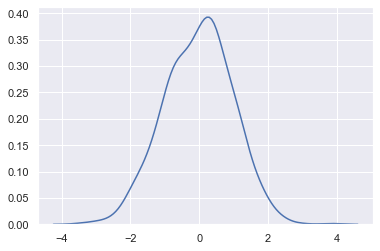

In [56]:
sns.kdeplot(x);

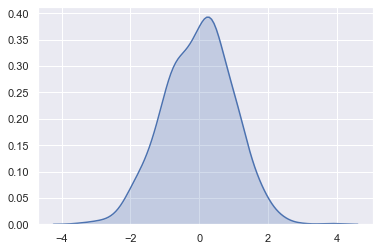

In [57]:
sns.kdeplot(x, shade=True);

In [58]:
y = np.random.uniform(size=1000)

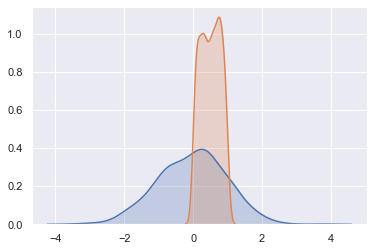

In [59]:
sns.kdeplot(x,shade=True)
sns.kdeplot(y,shade=True);

In [60]:
d = sns.load_dataset('diamonds')

In [61]:
d

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [62]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


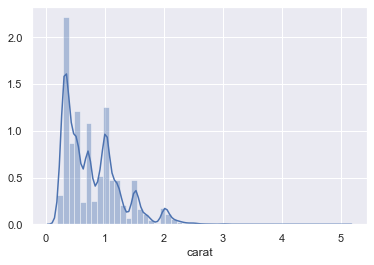

In [63]:
sns.distplot(d.carat);

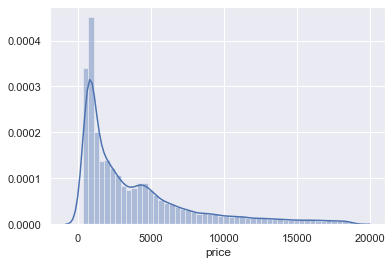

In [64]:
sns.distplot(d.price);

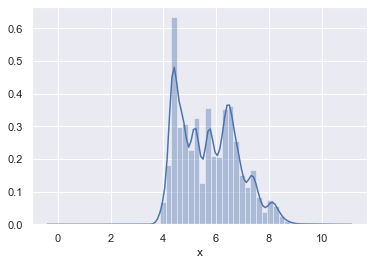

In [65]:
sns.distplot(d.x);

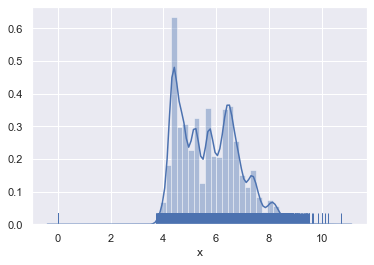

In [66]:
sns.distplot(d.x, rug=True);

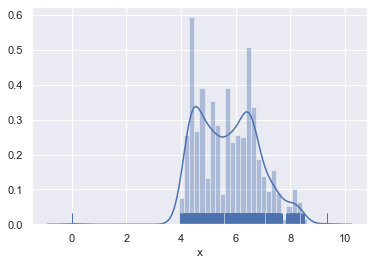

In [67]:
sns.distplot(d.sample(1000).x, rug=True, bins=50);

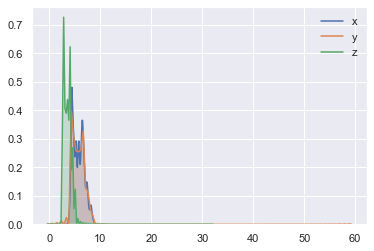

In [68]:
sns.kdeplot(d.x, shade=True)
sns.kdeplot(d.y, shade=True)
sns.kdeplot(d.z, shade=True);

### Box plot

In [69]:
x = np.random.normal(size=1000)

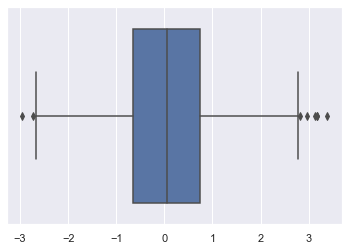

In [70]:
sns.boxplot(x)

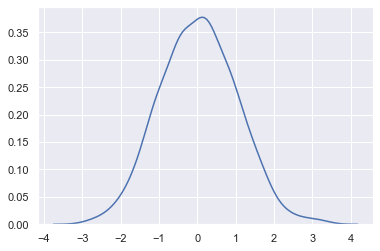

In [71]:
sns.kdeplot(x);

In [72]:
x = np.random.uniform(size=1000)

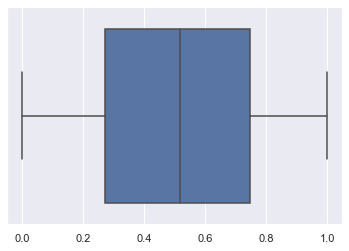

In [73]:
sns.boxplot(x);

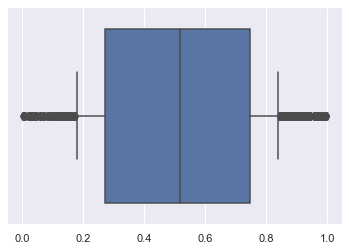

In [74]:
sns.boxplot(x, whis=0.2)

In [75]:
x = np.random.normal(size=1000)

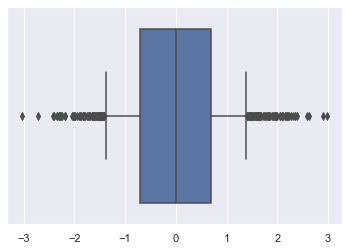

In [76]:
sns.boxplot(x, whis=0.5);

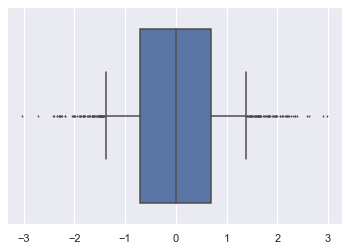

In [77]:
sns.boxplot(x, whis=0.5, fliersize=1);

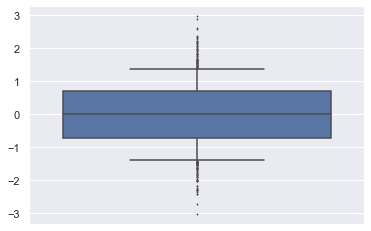

In [78]:
sns.boxplot(x, whis=0.5, fliersize=1, orient='v');

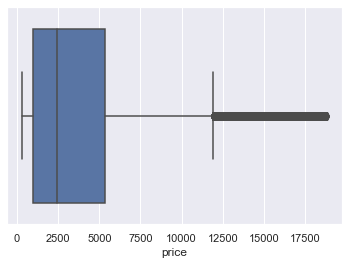

In [79]:
sns.boxplot(d.price);

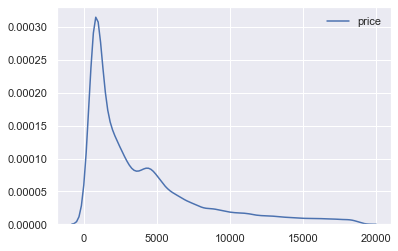

In [80]:
sns.kdeplot(d.price);

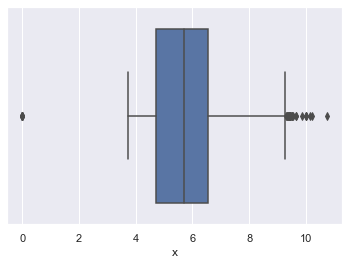

In [81]:
sns.boxplot(d.x);

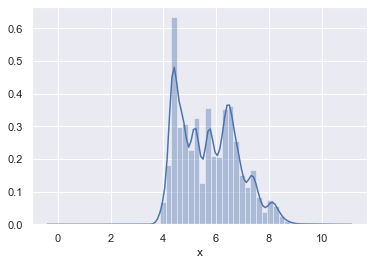

In [82]:
sns.distplot(d.x);

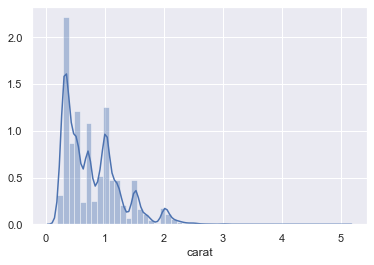

In [83]:
sns.distplot(d.carat)

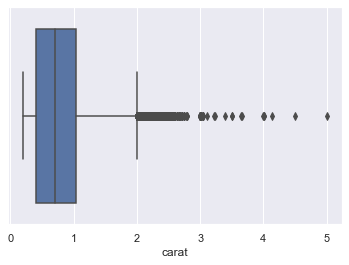

In [84]:
sns.boxplot(d.carat)

### Boxen plots

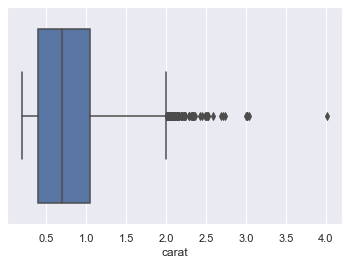

In [85]:
sns.boxplot(d.sample(5000).carat);

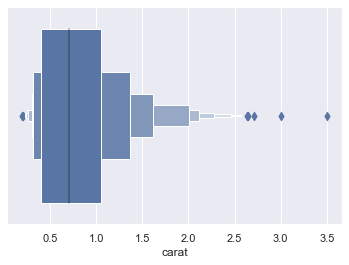

In [86]:
sns.boxenplot(d.sample(5000).carat);

In [87]:
sns.boxenplot(x = 'island', y = 'body_mass_g', data = p);

NameError: name 'p' is not defined

## Distribution of a categorical variable

### Bar plots

In [ ]:
c = d.groupby('cut')['cut'].count()

In [ ]:
sns.barplot(x=c.index, y=c.values)

In [ ]:
c = d.groupby('clarity')['clarity'].count()

In [ ]:
sns.barplot(x=c.index, y=c.values);

In [ ]:
c = d.groupby('color')['color'].count()

In [ ]:
sns.barplot(x=c.index, y=c.values);

## Joint distribution of two variables

### Jointplot

In [ ]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)

In [ ]:
df = pd.DataFrame({'x': x, 'y': y})

In [ ]:
sns.jointplot('x', 'y', data=df);

In [ ]:
sns.jointplot('x', 'y', data=df, kind='kde');

In [ ]:
x = np.random.normal(size=1000)
y = 3 * x + np.random.normal(size=1000)/5

In [ ]:
df = pd.DataFrame({'x': x, 'y': y})

In [ ]:
sns.jointplot('x', 'y', data=df, kind='kde');

In [ ]:
sns.jointplot('carat', 'price', data=d, kind='kde');

In [ ]:
sns.jointplot('carat', 'price', data=d.sample(500));

In [ ]:
sns.jointplot('x', 'price', data=d.sample(500));

In [ ]:
sns.jointplot('x', 'price', data=d.sample(500), kind='kde');

### Swarm plot

In [ ]:
sns.swarmplot(d.sample(1000).carat);

In [ ]:
sns.swarmplot(d.sample(100).price);

In [ ]:
d.info()

In [ ]:
sns.swarmplot(x='cut', y='price', data=d.sample(1000));

In [ ]:
sns.swarmplot(x='color', y='price', data=d.sample(1000));

In [ ]:
sns.swarmplot(x='clarity', y='price', data=d.sample(1000));

In [ ]:
sns.swarmplot(x='clarity', y='price', data=d.sample(1000));

In [ ]:
p = sns.load_dataset('penguins')

In [ ]:
p

In [ ]:
sns.swarmplot(x='species', y='body_mass_g', data=p);

In [ ]:
sns.swarmplot(x='island', y='body_mass_g', data=p);

In [ ]:
sns.swarmplot(x='body_mass_g', data=p);

### Violin plot

In [ ]:
sns.violinplot(x='body_mass_g', data=p);

In [ ]:
sns.boxplot(x='body_mass_g', data=p);

In [ ]:
sns.kdeplot(p.body_mass_g, shade=True);

In [ ]:
fig, axs = plt.subplots(nrows=4)
sns.swarmplot(x='body_mass_g', data=p, ax=axs[0]);
sns.violinplot(x='body_mass_g', data=p, ax=axs[1]);
sns.boxplot(x='body_mass_g', data=p, ax=axs[2]);
sns.kdeplot(p.body_mass_g, shade=True, ax=axs[3]);

In [ ]:
fig, axs = plt.subplots(nrows=4)
fig.set_size_inches(5, 10);
sns.swarmplot(x='body_mass_g', data=p, ax=axs[0]);
sns.violinplot(x='body_mass_g', data=p, ax=axs[1]);
sns.boxplot(x='body_mass_g', data=p, ax=axs[2]);
sns.kdeplot(p.body_mass_g, shade=True, ax=axs[3]);

In [ ]:
fig, axs = plt.subplots(nrows=4)
fig.set_size_inches(5, 10);
p1 = sns.swarmplot(x='body_mass_g', data=p, ax=axs[0]);
p1.set(xlim=(2000, 7500));
p2 = sns.violinplot(x='body_mass_g', data=p, ax=axs[1]);
p2.set(xlim=(2000, 7500));
p3 = sns.boxplot(x='body_mass_g', data=p, ax=axs[2]);
p3.set(xlim=(2000, 7500));
p4 = sns.kdeplot(p.body_mass_g, shade=True, ax=axs[3]);
p4.set(xlim=(2000, 7500));

In [ ]:
sns.violinplot(x='body_mass_g', data=p);

In [ ]:
sns.violinplot(x='body_mass_g', data=p, orient='v');

In [ ]:
sns.violinplot(x='species', y='body_mass_g', data=p);

In [ ]:
p.head()

In [ ]:
sns.violinplot(x='species', y='flipper_length_mm', data=p);

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', data=p);

In [ ]:
sns.violinplot(x='sex', y='flipper_length_mm', data=p);

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', data=p);

In [ ]:
sns.swarmplot(x='island', y='flipper_length_mm', data=p);

In [ ]:
sns.swarmplot(x='island', y='flipper_length_mm', hue='sex', data=p);

In [ ]:
sns.swarmplot(x='island', y='flipper_length_mm', hue='species', data=p);

In [ ]:
sns.swarmplot(x='cut', y='price', data=d.sample(1000));

In [ ]:
sns.swarmplot(x='cut', y='price', hue='color', data=d.sample(1000));

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', data=p[p.sex=='MALE']);

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', data=p[p.sex=='FEMALE']);

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', hue='sex', split=True, data=p);

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', 
               hue='sex', split=True, inner='quartile', data=p);

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', 
               hue='species', split=True, inner='quartile', data=p);

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', 
               hue='species', data=p);

In [ ]:
p['binary_species'] = p.species.apply(lambda x: 0 if x == 'Gentoo' else 1)

In [ ]:
p

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', 
               hue='binary_species', split=True, inner='quartile', data=p);

In [ ]:
p['binary_species'] = p.species.apply(lambda x: 'Gentoo' if x == 'Gentoo' else 'Adelie | Chinstrap')

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', 
               hue='binary_species', split=True, inner='quartile', data=p);

### Faceted plotting

In [ ]:
sns.kdeplot(p.flipper_length_mm, shade=True);

In [ ]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True);

In [ ]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True);
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade=True);
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade=True);

In [ ]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True);
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade=True);
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade=True);
plt.legend(title='Species', labels=['Gentoo', 'Adelie', 'Chinstrap']);


In [ ]:
sns.boxplot(p[p.species == 'Gentoo'].flipper_length_mm);
sns.boxplot(p[p.species == 'Adelie'].flipper_length_mm);
sns.boxplot(p[p.species == 'Chinstrap'].flipper_length_mm);
plt.legend(title='Species', labels=['Gentoo', 'Adelie', 'Chinstrap']);


In [ ]:
fig, axs = plt.subplots(nrows=3);
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True, ax=axs[0]);
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade=True, ax=axs[1]);
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade=True, ax=axs[2]);
# plt.legend(title='Species', labels=['Gentoo', 'Adelie', 'Chinstrap']);

In [ ]:
fig, axs = plt.subplots(nrows=3);
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True, ax=axs[0]);
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade=True, ax=axs[1]);
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade=True, ax=axs[2]);
plt.tight_layout()
# plt.legend(title='Species', labels=['Gentoo', 'Adelie', 'Chinstrap']);

In [ ]:
column_name = 'species'
nrows = len(p[column_name].unique())
fig, axs = plt.subplots(nrows=nrows);
i = 0
for c_v in p[column_name].unique():
    pl = sns.kdeplot(p[p[column_name] == c_v].flipper_length_mm, 
                shade=True, ax=axs[i]);
    pl.set_title(c_v);
    i += 1
plt.tight_layout()

In [ ]:
g = sns.FacetGrid(p, row='species');
g.map(sns.kdeplot, 'flipper_length_mm', shade=True);

In [ ]:
g = sns.FacetGrid(p, col='species');
g.map(sns.kdeplot, 'flipper_length_mm', shade=True);

In [ ]:
g = sns.FacetGrid(p, col='island');
g.map(sns.kdeplot, 'flipper_length_mm', shade=True);

In [ ]:
g = sns.FacetGrid(p, col='island');
g.map(sns.distplot, 'flipper_length_mm');

In [ ]:
g = sns.FacetGrid(p, col='island', row='sex');
g.map(sns.distplot, 'flipper_length_mm');

In [ ]:
g = sns.FacetGrid(p, col='island', row='sex');
g.map(sns.kdeplot, 'flipper_length_mm');

In [ ]:
g = sns.FacetGrid(p, col='island', row='sex');
g.map(sns.violinplot, 'flipper_length_mm');

### Pair plot

In [ ]:
sns.jointplot(p.body_mass_g, p.flipper_length_mm);

In [ ]:
sns.jointplot(p.body_mass_g, p.culmen_depth_mm);

In [ ]:
sns.pairplot(p);

In [ ]:
sns.pairplot(p, hue='sex');

In [ ]:
sns.pairplot(p, hue='species');

In [ ]:
sns.pairplot(d.sample(1000));

In [ ]:
sns.pairplot(d.sample(1000), hue='cut');

In [ ]:
sns.pairplot(d.sample(1000), hue='cut', corner=True);